In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,Aer,assemble
from numpy import pi



In [2]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.initialize([1,0],qreg_q[0])
circuit.initialize([1,0],qreg_q[1])
circuit.initialize([1,0],qreg_q[2])
circuit.initialize([0,1], qreg_q[3])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[3])


circuit.cx(qreg_q[2], qreg_q[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
q0 = circuit.measure(qreg_q[0], creg_c[0])
q1 = circuit.measure(qreg_q[1], creg_c[1])
q2 = circuit.measure(qreg_q[2], creg_c[2])

circuit.measure(qreg_q[3], creg_c[3])
circuit.draw()

┌─────────────────┐┌───┐           ░ ┌───┐ ░ ┌─┐         
q_0: ┤ Initialize(1,0) ├┤ H ├──■────────░─┤ H ├─░─┤M├─────────
     ├─────────────────┤├───┤  │        ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ Initialize(1,0) ├┤ H ├──┼────────░─┤ H ├─░──╫─┤M├──────
     ├─────────────────┤├───┤  │        ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ Initialize(1,0) ├┤ H ├──┼────■───░─┤ H ├─░──╫──╫─┤M├───
     ├─────────────────┤├───┤┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║ └╥┘┌─┐
q_3: ┤ Initialize(0,1) ├┤ H ├┤ X ├┤ X ├─░───────░──╫──╫──╫─┤M├
     └─────────────────┘└───┘└───┘└───┘ ░       ░  ║  ║  ║ └╥┘
c: 4/══════════════════════════════════════════════╩══╩══╩══╩═
                                                   0  1  2  3

In [3]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.-0.j -0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j  0.+0.j  0.+0.j]


In [4]:
sv_sim = Aer.get_backend('aer_simulator')

In [5]:
circuit.save_statevector()
qobj = assemble(circuit)
job2 = sv_sim.run(qobj)
ket = job2.result().get_statevector()
ket

array([ 0.+0.000000e+00j,  0.+0.000000e+00j,  0.+0.000000e+00j,
        0.+0.000000e+00j,  0.+0.000000e+00j,  0.+0.000000e+00j,
       -0.+0.000000e+00j,  0.+0.000000e+00j,  0.+0.000000e+00j,
        0.+0.000000e+00j,  0.+0.000000e+00j,  0.+0.000000e+00j,
        0.+0.000000e+00j, -1.+3.061617e-16j,  0.+0.000000e+00j,
        0.+0.000000e+00j])

In [6]:
for amplitude in ket:
    print(amplitude)

0j
0j
0j
0j
0j
0j
(-0+0j)
0j
0j
0j
0j
0j
0j
(-1+3.061616997868384e-16j)
0j
0j


In [7]:
hist = job2.result().get_counts()
print(hist)

{'0101': 502, '1101': 522}


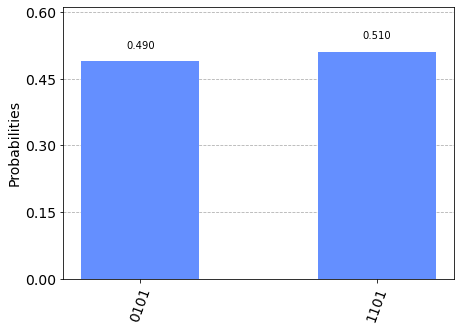

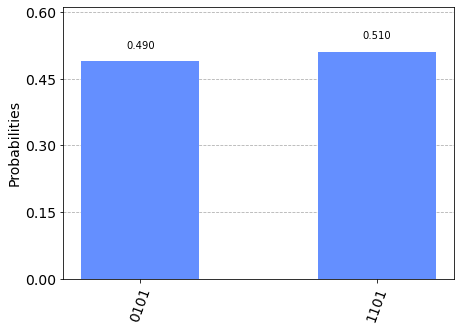

In [8]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)

In [14]:
backend3 = provider.get_backend('ibmq_belem')

NameError: name 'provider' is not defined